#Imports

In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns

#Load data set

In [ ]:
mpg_data = pd.read_csv('/content/drive/MyDrive/CS 356/mpg.csv')
mpg_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


#About Data

In [ ]:
mpg_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


There seems to be something other than numbers in horsepower that shouldnt be there

In [ ]:
non_numeric_horsepower = pd.to_numeric(mpg_data['horsepower'], errors='coerce').isna()
mpg_data[non_numeric_horsepower]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


In [ ]:
#Describe the dataset
mpg_data.describe(include = 'all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
mpg,398.0,NaN,NaN,NaN,23.514573,7.815984,9.0,17.5,23.0,29.0,46.6
cylinders,398.0,NaN,NaN,NaN,5.454774,1.701004,3.0,4.0,4.0,8.0,8.0
displacement,398.0,NaN,NaN,NaN,193.425879,104.269838,68.0,104.25,148.5,262.0,455.0
horsepower,398,94,150,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weight,398.0,NaN,NaN,NaN,2970.424623,846.841774,1613.0,2223.75,2803.5,3608.0,5140.0
acceleration,398.0,NaN,NaN,NaN,15.56809,2.757689,8.0,13.825,15.5,17.175,24.8
model year,398.0,NaN,NaN,NaN,76.01005,3.697627,70.0,73.0,76.0,79.0,82.0
origin,398.0,NaN,NaN,NaN,1.572864,0.802055,1.0,1.0,1.0,2.0,3.0
car name,398,305,ford pinto,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#Clean data

In [ ]:
import numpy as np

#Car name column can be dropped as this column cannot be fit into model
mpg_data.drop('car name', axis = 1, inplace = True)
mpg_data = mpg_data.replace('?', np.nan)
mpg_data[mpg_data.isnull().any(axis = 1)]
#mpg_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
32,25.0,4,98.0,NaN,2046,19.0,71,1
126,21.0,6,200.0,NaN,2875,17.0,74,1
330,40.9,4,85.0,NaN,1835,17.3,80,2
336,23.6,4,140.0,NaN,2905,14.3,80,1
354,34.5,4,100.0,NaN,2320,15.8,81,2
374,23.0,4,151.0,NaN,3035,20.5,82,1


In [ ]:
mpg_data.median()
mpg_data = mpg_data.apply(lambda x: x.fillna(x.median()), axis = 0)
mpg_data['horsepower'] = mpg_data['horsepower'].astype('float64')
mpg_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1


In [ ]:
mpg_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 25.0 KB


In [ ]:
mpg_data['origin'] = mpg_data['origin'].replace({1:'america',2:'europe',3:'asia'})

mpg_data = pd.get_dummies(mpg_data, columns = ['origin'])
mpg_data['origin_america'] = mpg_data['origin_america'].astype(int)
mpg_data['origin_asia'] = mpg_data['origin_asia'].astype(int)
mpg_data['origin_europe'] = mpg_data['origin_europe'].astype(int)
mpg_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130.0,3504,12.0,70,1,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,0,0


In [ ]:
# Checking for outliers using the IQR method
Q1 = mpg_data.quantile(0.25)
Q3 = mpg_data.quantile(0.75)
IQR = Q3 - Q1
outliers = ((mpg_data < (Q1 - 1.5 * IQR)) | (mpg_data > (Q3 + 1.5 * IQR))).sum()

outliers

mpg                1
cylinders          0
displacement       0
horsepower        11
weight             0
acceleration       7
model year         0
origin_america     0
origin_asia       79
origin_europe     70
dtype: int64

Theres an outlier in mpg, horsepower, and acceleration.

In [ ]:
import pandas as pd

# Calculate Q1, Q3, and IQR for specified columns
Q1 = mpg_data[['mpg', 'horsepower', 'acceleration']].quantile(0.25)
Q3 = mpg_data[['mpg', 'horsepower', 'acceleration']].quantile(0.75)
IQR = Q3 - Q1

# Define a mask for rows with outliers in these columns
outlier_mask = ((mpg_data[['mpg', 'horsepower', 'acceleration']] < (Q1 - 1.5 * IQR)) |
                (mpg_data[['mpg', 'horsepower', 'acceleration']] > (Q3 + 1.5 * IQR)))

# Apply mask to keep only non-outlier rows
mpg_data_clean = mpg_data[~outlier_mask.any(axis=1)]


#Graphs

<ipython-input-12-bdbe5bd969be>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(mpg_data['mpg'])


<Axes: xlabel='mpg', ylabel='Density'>

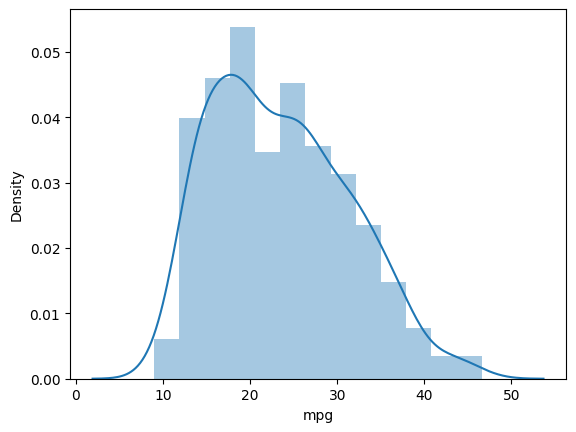

In [ ]:
sns.distplot(mpg_data['mpg'])

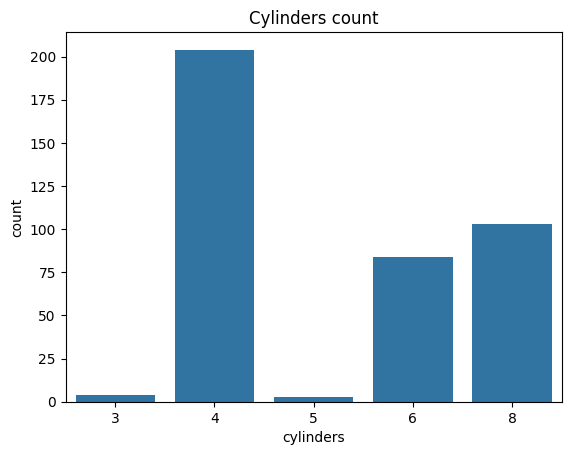

In [ ]:
sns.countplot(x=mpg_data["cylinders"], data=mpg_data)
plt.title('Cylinders count')
plt.show()

Very litle 3 and 5 cylinders

Slightly skewed

#Correlations

<Axes: >

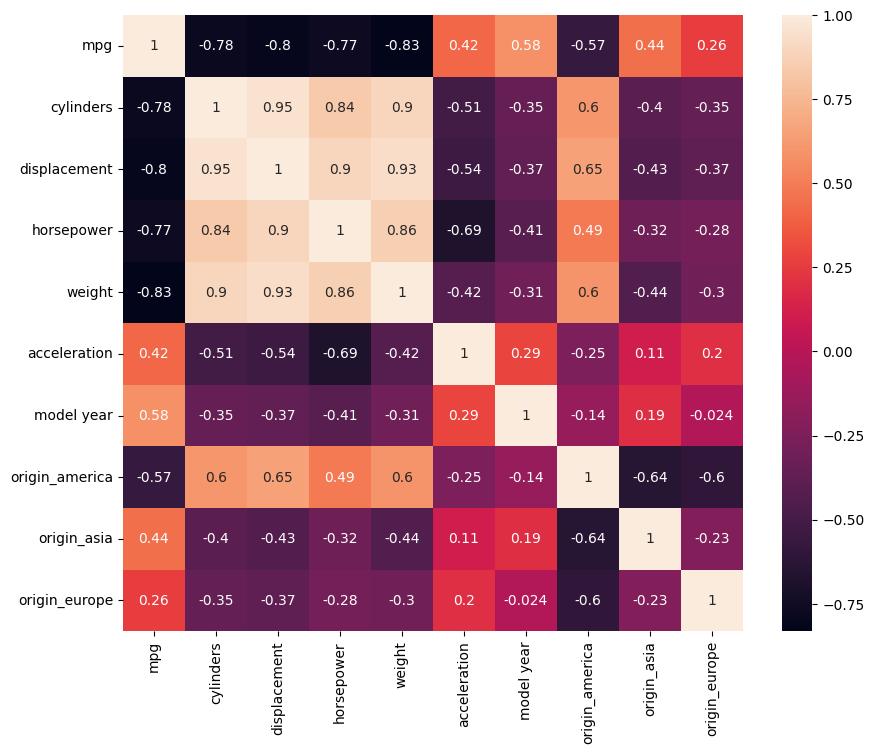

In [ ]:
import seaborn as sns
plt.figure(figsize = (10,8))
sns.heatmap(mpg_data.corr(), annot = True)

In [ ]:
corr_matrix = mpg_data.corr()
corr_matrix["mpg"]

mpg               1.000000
cylinders        -0.775396
displacement     -0.804203
horsepower       -0.773453
weight           -0.831741
acceleration      0.420289
model year        0.579267
origin_america   -0.568192
origin_asia       0.442174
origin_europe     0.259022
Name: mpg, dtype: float64

Cylinders, displacenent, horsepower, weight have high correlations with mpg

In [ ]:
corr_features = ['mpg', 'cylinders', 'horsepower','displacement', 'weight']

In [ ]:
mpg_data[corr_features]

,mpg,cylinders,horsepower,displacement,weight
0,18.0,8,130.0,307.0,3504
1,15.0,8,165.0,350.0,3693
2,18.0,8,150.0,318.0,3436
3,16.0,8,150.0,304.0,3433
4,17.0,8,140.0,302.0,3449
...,...,...,...,...,...
393,27.0,4,86.0,140.0,2790
394,44.0,4,52.0,97.0,2130
395,32.0,4,84.0,135.0,2295
396,28.0,4,79.0,120.0,2625


#Regression Trees

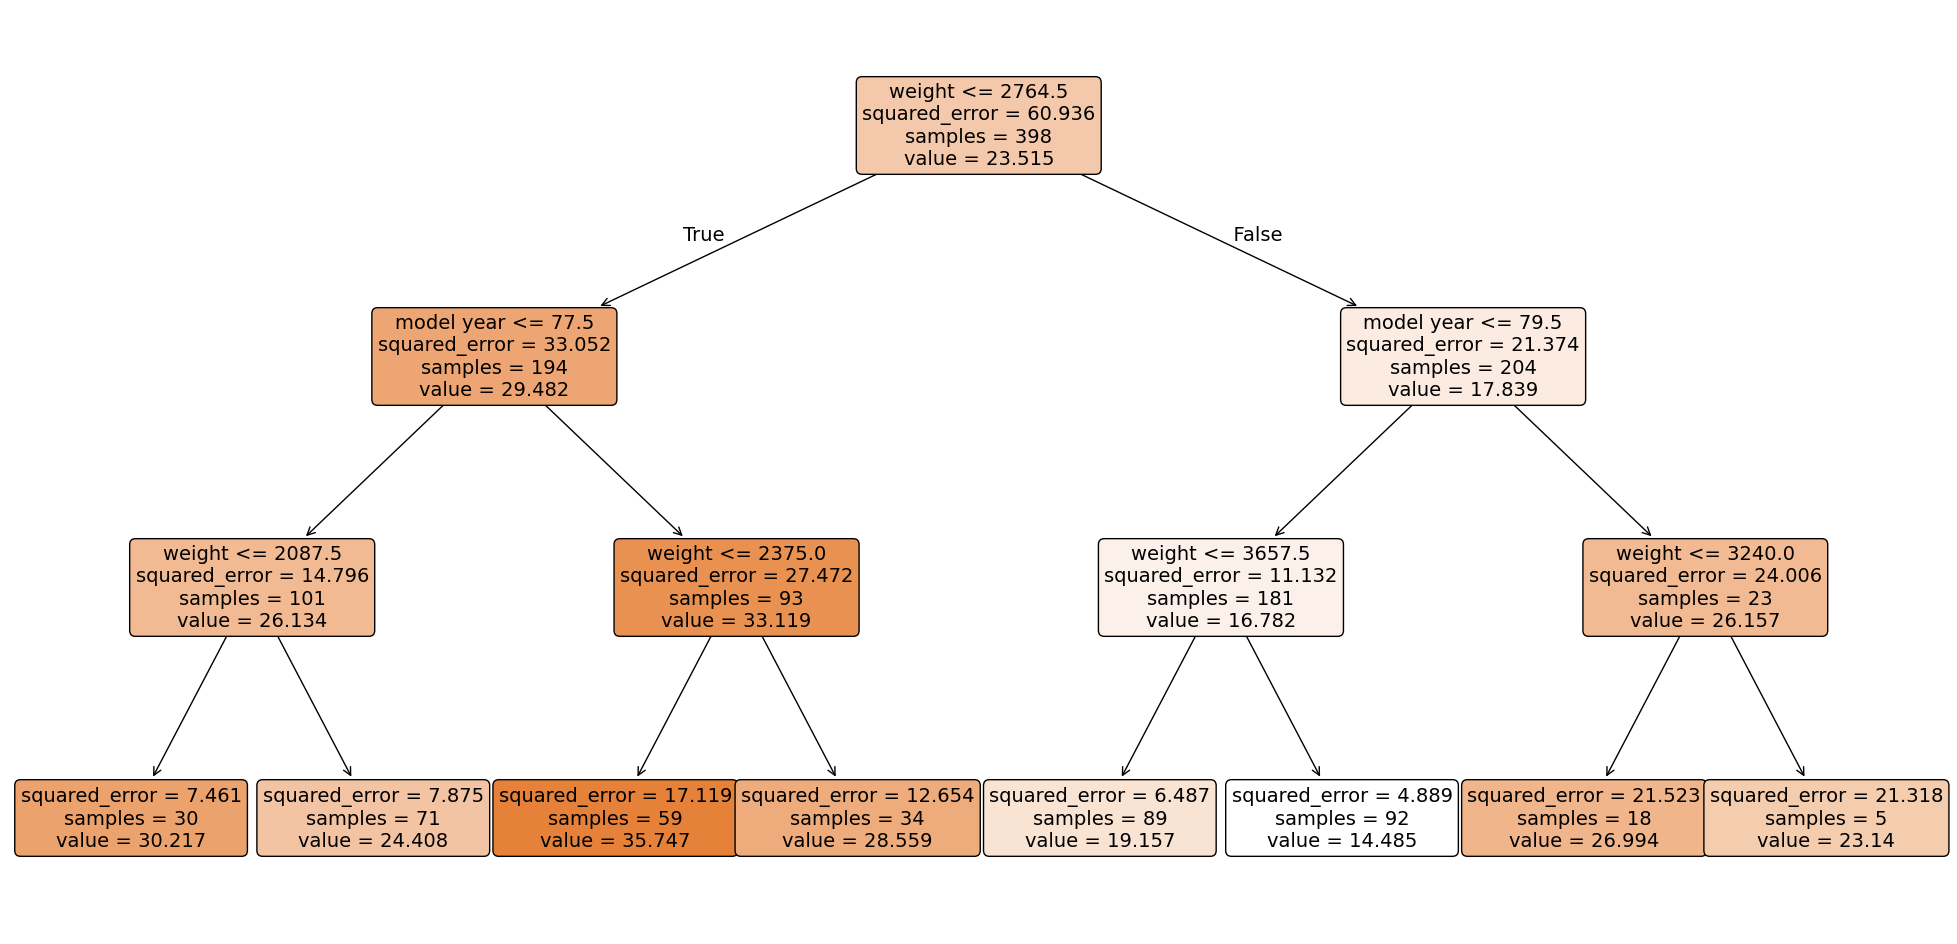

In [ ]:
X = mpg_data[['weight', 'model year']]
y = mpg_data['mpg']

reg_tree = DecisionTreeRegressor(random_state=100, max_depth=3, min_samples_leaf=5)

reg_tree.fit(X, y)

plt.figure(figsize=(25, 12))
tree.plot_tree(reg_tree, feature_names=X.columns, filled=True, rounded=True, fontsize=14)
plt.show()


In [ ]:
# Generate text output of the decision tree
text_representation = tree.export_text(reg_tree, feature_names=list(X.columns))
print(text_representation)


|--- weight <= 2764.50
|   |--- model year <= 77.50
|   |   |--- weight <= 2087.50
|   |   |   |--- value: [30.22]
|   |   |--- weight >  2087.50
|   |   |   |--- value: [24.41]
|   |--- model year >  77.50
|   |   |--- weight <= 2375.00
|   |   |   |--- value: [35.75]
|   |   |--- weight >  2375.00
|   |   |   |--- value: [28.56]
|--- weight >  2764.50
|   |--- model year <= 79.50
|   |   |--- weight <= 3657.50
|   |   |   |--- value: [19.16]
|   |   |--- weight >  3657.50
|   |   |   |--- value: [14.48]
|   |--- model year >  79.50
|   |   |--- weight <= 3240.00
|   |   |   |--- value: [26.99]
|   |   |--- weight >  3240.00
|   |   |   |--- value: [23.14]



#Other models

##Linear Regression

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

X = mpg_data.drop('mpg', axis = 1)
y = mpg_data[['mpg']]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Initialize the scaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Create a linear regression model
model = LinearRegression()

# Train the model with the scaled training data
model.fit(X_train, y_train)

print("LR Coef: ",model.coef_)

# Predict the values using the scaled test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)

LR Coef:  [[-2.05486781e-01  1.78250238e+00 -1.96021638e-01 -5.66764272e+00
   2.47216694e-01  2.87725770e+00  3.63196205e+14  2.98813885e+14
   2.86745621e+14]]
Mean Squared Error: 8.795825698204569
R2 Score: 0.8450989597367559


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.ensemble import (AdaBoostRegressor,
                              RandomForestRegressor,
                              ExtraTreesRegressor,
                              GradientBoostingRegressor)
from sklearn.linear_model import (LinearRegression,
                                  Ridge,
                                  Lasso,
                                  ElasticNet)



X = mpg_data.drop('mpg', axis=1)
y = mpg_data['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), X.columns)
    ])


models = [
    SVR(),
    DecisionTreeRegressor(),
    KNeighborsRegressor(),
    AdaBoostRegressor(),
    RandomForestRegressor(),
    ExtraTreesRegressor(),
    GradientBoostingRegressor(),
    LinearRegression(),
    Ridge(),
    Lasso(),
    ElasticNet()
]


results = []
for model in models:
    # Create a pipeline with the current model
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', model)])

    # Fit model
    pipeline.fit(X_train, y_train)

    # Predict and evaluate
    y_pred = pipeline.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store results
    results.append({
        'model': type(model).__name__,
        'MSE': mse,
        'R2': r2
    })

# Display results
results_df = pd.DataFrame(results)
print(results_df)


                        model        MSE        R2
0                         SVR   8.075085  0.857792
1       DecisionTreeRegressor  13.421500  0.763637
2         KNeighborsRegressor   6.577528  0.884165
3           AdaBoostRegressor   8.788832  0.845222
4       RandomForestRegressor   6.586072  0.884014
5         ExtraTreesRegressor   6.711297  0.881809
6   GradientBoostingRegressor   6.865455  0.879094
7            LinearRegression   8.795826  0.845099
8                       Ridge   8.953030  0.842330
9                       Lasso   9.239996  0.837277
10                 ElasticNet  10.823938  0.809382


#Try tpot

In [ ]:
!pip install tpot

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tpot import TPOTRegressor

# Creating the dataframes X and y
X = mpg_data[['weight', 'model year']]
y = mpg_data['mpg']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Create a TPOT regressor with specific configurations
tpot = TPOTRegressor(generations=5, population_size=50, verbosity=2, random_state=42)

# Fit the TPOT regressor to the training data
tpot.fit(X_train, y_train)

# Score the model on the test data
print(f'Test Score: {tpot.score(X_test, y_test)}')

# Export the best model
tpot.export('best_mpg_model.py')


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -9.180836485558897

Generation 2 - Current best internal CV score: -9.180836485558897

Generation 3 - Current best internal CV score: -8.892907525730106

Generation 4 - Current best internal CV score: -8.892907525730106

Generation 5 - Current best internal CV score: -8.892907525730106

Best pipeline: ExtraTreesRegressor(input_matrix, bootstrap=True, max_features=0.5, min_samples_leaf=1, min_samples_split=7, n_estimators=100)
Test Score: -6.2576681748831495


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_absolute_error

extra_trees_regressor = ExtraTreesRegressor(
    bootstrap=True,
    max_features=0.5,
    min_samples_leaf=1,
    min_samples_split=7,
    n_estimators=100,
    random_state=42
)

# Fit the model on the training data
extra_trees_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = extra_trees_regressor.predict(X_test)

# Calculate the mean absolute error on the test set
mae = mean_absolute_error(y_test, y_pred)
print(f'Test Mean Absolute Error: {mae}')

from sklearn.metrics import r2_score

# Calculate R-squared on the test set
r2 = r2_score(y_test, y_pred)
print(f'Test R-squared: {r2}')


Test Mean Absolute Error: 1.8143572894727829
Test R-squared: 0.8897978037343945


There are clear trends showing that cars with more cylinders, higher displacement, and greater weight tend to have lower mpg.

Various models were evaluated using a pipeline, including SVR, Decision Tree Regressor, K-Neighbors Regressor, AdaBoost Regressor, Random Forest Regressor, Extra Trees Regressor, Gradient Boosting Regressor, Linear Regression, Ridge, Lasso, and ElasticNet. The models were compared based on their Mean Squared Error and R-squared values. The K-Neighbors Regressor, Random Forest Regressor, and Extra Trees Regressor performed well with high R-squared values and low MSE.TPOT was used to automate the process of finding the best machine learning pipeline. The TPOT regressor provided a test score and exported the best model. Extra Trees Regressor.

The Extra Trees Regressor from the TPOT pipeline was further evaluated. It provided a Test Mean Absolute Error of 1.814 and an R-squared value of 0.890, indicating a strong model performance - it was the lowest of all my models that I tried.

The K-Neighbors Regressor and Random Forest Regressor are the best performing models tried before tpot with the lowest MSE and highest R-squared values.
Both models have R2 scores around 0.884 and MSE around 6.58, indicating strong predictive power.
I'd employ the K-Neighbors Regressor, Random Forest Regressor, extra trees regressor for practical applications requiring mpg predictions. I'd also look at feauture engineering or using differet feautures for the predictions and see if that gives a better prediction model.